In [1]:
%load_ext autoreload
%autoreload 2

# PTP1B Ligands

In [2]:
from pathlib import Path

import numpy as np
from MolClusterkit.mcs import MCSClustering
from QligFEP.lig_aligner import GlobalLigandAligner
from QligFEP.visualization import render_system
from seaborn import clustermap

In [3]:
ligands = "ptp1b/ligands/ligands.sdf"

aligner = GlobalLigandAligner(lig=ligands)
_ = aligner.display_overlay(*aligner.lig_names, size=(600, 300), render=True)

2025-04-15 19:15:02 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list for molecule 23469. Reindexed.
2025-04-15 19:15:02 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list for molecule 23483. Reindexed.
2025-04-15 19:15:02 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list for molecule 23480. Reindexed.
2025-04-15 19:15:02 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list for molecule 23474. Reindexed.
2025-04-15 19:15:02 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list for molecule 23473. Reindexed.
2025-04-15 19:15:02 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list for molecule 23471. Reindexed.
2025-04-15 19:15:02 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list fo

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
names, smiles = zip(*[[name, mol.to_smiles()] for name, mol in aligner])
names = list(names)
smiles = list(smiles)

## Ligand clustering

First we cluster the ligands so we can have a better overview of how they relate with regards to the maximum common substructure (MCS). Notice the settings we're using. We do so because our post-processing of the ligand restraints won't map non-equivalent ring structures. Therefore, we pass the argument `ringMachesRingOnly`.

In [5]:
clusterer = MCSClustering(
    smiles_list=smiles,
    timeout=20,
    atomCompare="CompareAnyHeavyAtom",
    bondCompare="CompareOrderExact",
    ringMatchesRingOnly=True,
)
clusterer.compute_similarity_matrix()

best_labels = clusterer.hierarchical_clustering(
    4
)  # we go for 4 clusters based on the plot

Applying mcs_similarity to chunks:   0%|          | 0/8 [00:00<?, ?chunk/s]

Applying mcs_similarity to chunks: 100%|██████████| 8/8 [00:07<00:00,  1.06chunk/s]
/zfsdata/data/david/tools/MolClusterkit/src/MolClusterkit/base_clusterer.py:82: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=method)


## Hierarchical clustering

From the plot below we can see 4 different clusters, which could make sense. We're going to use this information just for the sake of visualization, since it'll allow us to look into structurally similar ligands batch by batch.

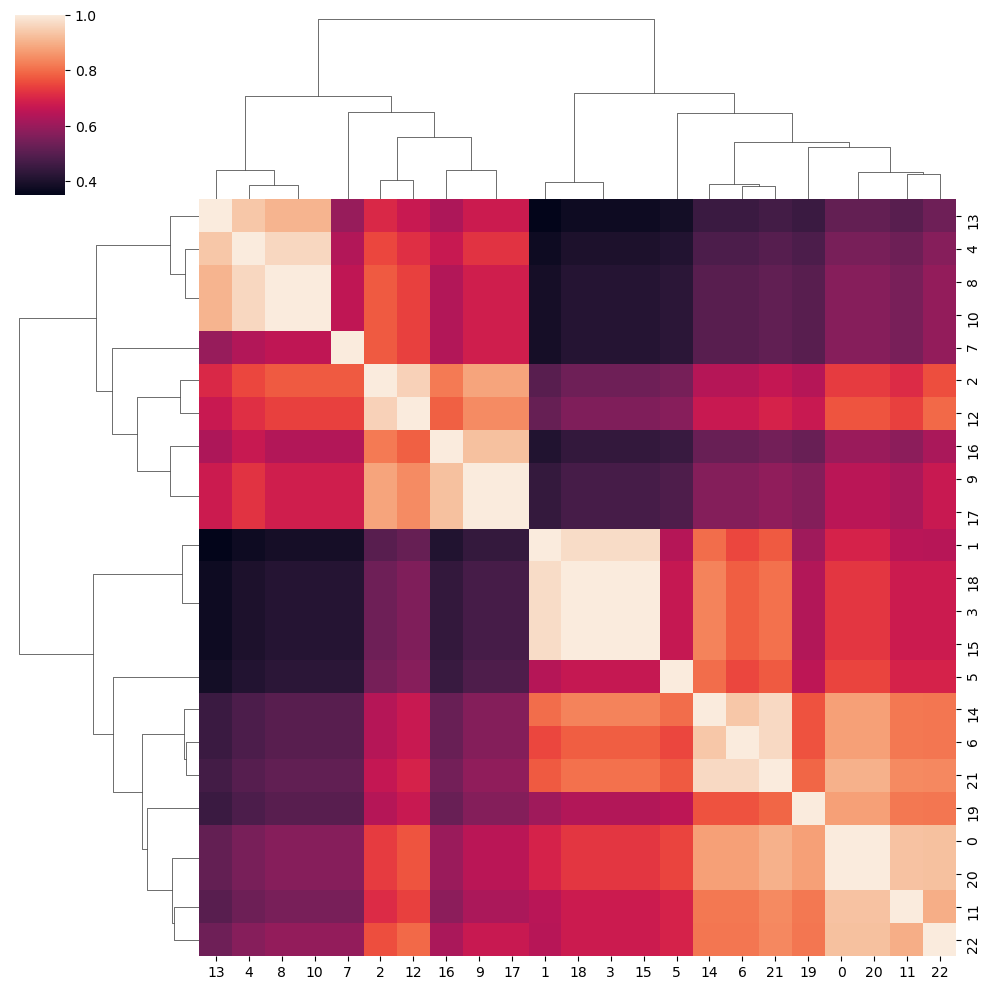

In [6]:
clusterplot = clustermap(clusterer.similarity_matrix)

## Ligands per cluster

In [7]:
clusters = {}

for label in range(4):
    idxs = np.where(np.array(best_labels) == label)[0]
    clusters[label] = np.take(names, idxs).tolist()

In [8]:
for clust_id, names in clusters.items():
    print(f"Cluster {clust_id}:")
    print(f"  {names}")
    aligner.display_overlay(*names, size=(600, 400), render=True)

Cluster 0:
  ['23469', '23473', '20669', '23472']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 1:
  ['23467', '23474', '23471', '23466', '23470', '23468']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 2:
  ['23484', '20667', '23486', '23485']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 3:
  ['23477', '23483', '23480', '23476', '23482', '23330', '20670', '23479', '23475']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Based on the renderings, we can see some of these molecules, though structurally very equivalent, are not so optimally aligned. We are going to improve this prior to creating the perturbation mapping, hopefully optimizing the perturbations

## Ligand alignment

### Ligand alignment - Cluster 3

In [9]:
aligned_23330 = aligner.align_single_molecule("23330", "23477")

print("Prior to ligand alignment")
aligner.display_overlay(
    *["23330", "23477", "23483", "23480", "23482", "20670", "23479"],
    size=(600, 400),
    render=True
)

print("After ligand alignment")
aligner.display_overlay(
    *[aligned_23330, "23477", "23483", "23480", "23482", "20670", "23479"],
    size=(600, 400)
)

Prior to ligand alignment


[19:15:17] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

After ligand alignment


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Ligand alignment - Cluster 0

In [10]:
aligned_23473 = aligner.align_single_molecule("23473", "23469")
aligned_20669 = aligner.align_single_molecule("20669", "23469")
aligned_23472 = aligner.align_single_molecule("23472", "23469")

print("Prior to ligand alignment")
aligner.display_overlay(
    *["23469", "23473", "20669", "23472"], size=(600, 400), render=True
)

print("After ligand alignment")
aligner.display_overlay(
    *[aligned_23473, aligned_20669, aligned_23472, "23469"], size=(600, 400)
)

[19:15:21] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[19:15:22] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


Prior to ligand alignment


[19:15:23] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

After ligand alignment


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Save aligned ligands - Cluster 0 and 3

In [11]:
realigned_compounds = ["23473", "20669", "23472", "23330"]

keep_compounds = [
    mol for mol in aligner.molecules if mol.name not in realigned_compounds
]
aligned_compounds = [aligned_20669, aligned_23330, aligned_23472, aligned_23473]

aligner.write_to_single_sdf(
    "../perturbations/ptp1b/ligands.sdf",
    molecules=[*keep_compounds, *aligned_compounds],
)

2025-04-15 19:15:29 | INFO     | QligFEP.chemIO:write_to_single_sdf:243 - molecules written to ../perturbations/ptp1b/ligands.sdf


## Final Check - with protein

Now we render the system to make sure we don't have any steric clashes.

In [12]:
render_system(
    molecules=[*keep_compounds, *aligned_compounds],
    protein_path="ptp1b/protein/protein.pdb",
)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Check ligands for CDK8

In [13]:
ligands = "cdk8/ligands/ligands.sdf"

aligner = GlobalLigandAligner(lig=ligands)
aligner.display_overlay(*aligner.lig_names, size=(600, 300))

2025-04-15 19:01:13 | WARNING  | QligFEP.chemIO:_force_H_reindexing:116 - Hydrogens not at the end of the atom list for molecule 17-flipped. Reindexed.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:
names, smiles = zip(*[[name, mol.to_smiles()] for name, mol in aligner])
names = list(names)
smiles = list(smiles)

Applying mcs_similarity to chunks:   0%|          | 0/8 [00:00<?, ?chunk/s]

Applying mcs_similarity to chunks: 100%|██████████| 8/8 [00:55<00:00,  6.94s/chunk]
/zfsdata/data/david/tools/MolClusterkit/src/MolClusterkit/base_clusterer.py:82: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method=method)


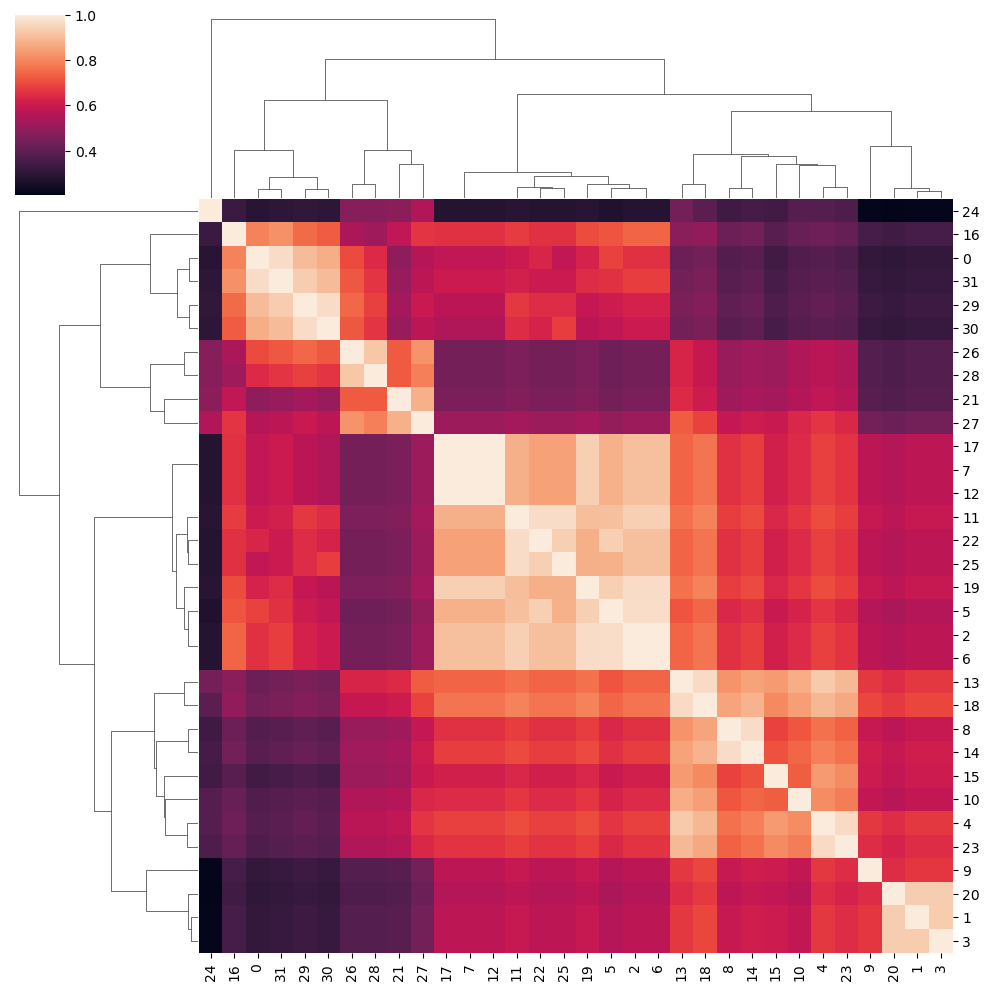

In [15]:
clusterer = MCSClustering(
    smiles_list=smiles,
    timeout=20,
    atomCompare="CompareAnyHeavyAtom",
    bondCompare="CompareOrderExact",
    ringMatchesRingOnly=True,
)
clusterer.compute_similarity_matrix()

best_labels = clusterer.hierarchical_clustering(6)

clustermap(clusterer.similarity_matrix)

In [16]:
clusters = {}

for label in range(6):
    idxs = np.where(np.array(best_labels) == label)[0]
    clusters[label] = np.take(names, idxs).tolist()

for clust_id, names in clusters.items():
    print(f"Cluster {clust_id}:")
    print(f"  {names}")
    aligner.display_overlay(*names, size=(600, 400), render=True)

Cluster 0:
  ['43', '13', '44-flipped', '45-flipped', '42-flipped']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 1:
  ['15', '18-flipped', '16-flipped', '17-flipped']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 2:
  ['14']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 3:
  ['30', '38', '31', '41', '35', '40', '39', '37', '34', '36']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 4:
  ['22', '21', '26', '23']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Cluster 5:
  ['24', '29', '20', '19', '33', '27', '32', '25']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
aligned_35 = aligner.align_single_molecule("35", "36")

print("Prior to ligand alignment")
aligner.display_overlay(*["35", "34", "36"], size=(600, 400), render=True)

print("After ligand alignment")
aligner.display_overlay(*[aligned_35, "34", "36"], size=(600, 400))

Prior to ligand alignment


[19:02:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

After ligand alignment


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
realigned_compounds = ["35"]

keep_compounds = [
    mol for mol in aligner.molecules if mol.name not in realigned_compounds
]
aligned_compounds = [aligned_35]

aligner.write_to_single_sdf(
    "../perturbations/cdk8/ligands.sdf", molecules=[*keep_compounds, *aligned_compounds]
)

2025-04-15 19:02:10 | INFO     | QligFEP.chemIO:write_to_single_sdf:243 - molecules written to ../perturbations/cdk8/ligands.sdf
